# Library

In [1]:
import os
import random
from shutil import copyfile
from PIL import Image, ImageFilter
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from livelossplot import PlotLossesKeras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# A. Akuisisi Citra

### Direktori Citra

In [2]:
#menyiapkan direktori
base_dir = """D:\\MyPython\\Sirsak"""

#menentukan direktori
bahan_dir = os.path.join(base_dir, 'bahan\\')
bahanedit_dir = os.path.join(base_dir, 'bahanedit\\')
train_dir = os.path.join(base_dir, 'training\\')
test_dir = os.path.join(base_dir, 'testing\\')
uji_dir = os.path.join(base_dir, 'ujiedit\\')

#menentukan direktori isi bahan
mentah_dir = os.path.join(bahan_dir,'mentah\\')
setmatang_dir = os.path.join(bahan_dir, 'setengah matang\\')
matang_dir = os.path.join(bahan_dir, 'matang\\')

#menentukan direktori isi training
train_mentah = os.path.join(train_dir,'mentah\\')
train_setmatang = os.path.join(train_dir, 'setengah matang\\')
train_matang= os.path.join(train_dir, 'matang\\')

#menentukan direktori isi testing
test_mentah= os.path.join(test_dir,'mentah\\')
test_setmatang = os.path.join(test_dir, 'setengah matang\\')
test_matang= os.path.join(test_dir, 'matang\\')


In [3]:
#mencetak ada berapa jumlah citra
print('Jumlah Data Buah Sirsak')
print('Jumlah citra mentah :', len(os.listdir(mentah_dir)))
print('Jumlah citra setengah matang :', len(os.listdir(setmatang_dir)))
print('Jumlah citra matang :', len(os.listdir(matang_dir)))

Jumlah Data Buah Sirsak
Jumlah citra mentah : 205
Jumlah citra setengah matang : 125
Jumlah citra matang : 265


In [4]:
#menentukan direktori setelah imagefilter
edit_mentah='D:\\MyPython\\Sirsak\\bahanedit\\mentah\\'
edit_setmatang='D:\\MyPython\\Sirsak\\bahanedit\\setengah matang\\'
edit_matang='D:\\MyPython\\Sirsak\\bahanedit\\matang\\'

### ImageFilter Menggunakan Pillow

In [5]:
# c=1
# for filename in os.listdir(mentah_dir):
#     if filename.endswith(".jpg"):
#         im0 = Image.open(os.path.join(mentah_dir,filename))
#         nama='imgmentah'+str(c)+'.png'
#         rgb_im0 = im0.filter(ImageFilter.SHARPEN)
#         rgb_im0.save(edit_mentah + nama)
# #         os.remove(edit_mentah + nama)
#         c+=1
#         continue
#     else:
#         continue


# for filename in os.listdir(setmatang_dir):
#     if filename.endswith(".jpg"):
#         im2 = Image.open(os.path.join(setmatang_dir,filename))
#         nama='imgsetmatang'+str(c)+'.png'
#         rgb_im2 = im2.filter(ImageFilter.SHARPEN)
#         rgb_im2.save(edit_setmatang + nama)
# #         os.remove(edit_setmatang + nama)
#         c+=1
#         continue
#     else:
#         continue


# for filename in os.listdir(matang_dir):
#     if filename.endswith(".jpg"):
#         im1 = Image.open(os.path.join(matang_dir,filename))
#         nama='imgmatang'+str(c)+'.png'
#         rgb_im1 = im1.filter(ImageFilter.SHARPEN)
#         rgb_im1.save(edit_matang + nama)
# #         os.remove(edit_matang + nama)
#         c+=1
#         continue
#     else:
#         continue

### Pembagian Data Training dan Data Testing

In [6]:
# #menyiapkan dataset

# def train_test_split(source, train, test, train_ratio):
#     total_size = len(os.listdir(source))
#     train_size = int(train_ratio * total_size)
#     test_size = total_size - train_size

#     randomized = random.sample(os.listdir(source), total_size)
#     train_files = randomized[0:train_size]
#     test_files = randomized[train_size:total_size]

#     for i in train_files:
#         i_file = source + i
#         destination = train + i
#         copyfile(i_file, destination)

#     for i in test_files:
#         i_file = source + i
#         destination = test + i
#         copyfile(i_file, destination)

In [7]:
# #jumlah pembagian data training dan testing
# train_ratio = 0.8

In [8]:
# #pembagian training dan testing

# #mentah
# source_00 = edit_mentah
# train_00 = train_mentah
# test_00 = test_mentah
# train_test_split(source_00, train_00, test_00, train_ratio)

# #setmatang
# source_01 = edit_setmatang
# train_01 = train_setmatang
# test_01 = test_setmatang
# train_test_split(source_01, train_01, test_01, train_ratio)

# #matang
# source_02 = edit_matang
# train_02 = train_matang
# test_02 = test_matang
# train_test_split(source_02, train_02, test_02, train_ratio)

In [9]:
print('Jumlah Keseluruhan citra:',len(os.listdir(mentah_dir))+len(os.listdir(setmatang_dir))+len(os.listdir(matang_dir)))
print('Jumlah Keseluruhan citra:',len(os.listdir(edit_mentah))+len(os.listdir(edit_setmatang))+len(os.listdir(edit_matang)))
print('Jumlah Keseluruhan training citra:',len(os.listdir(train_mentah))+len(os.listdir(train_setmatang))+len(os.listdir(train_matang)))
print('Jumlah Keseluruhan testing citra:',len(os.listdir(test_mentah))+len(os.listdir(test_setmatang))+len(os.listdir(test_matang)))
print()

#mencetak jumlah mentah
print('Jumlah Keseluruhan citra mentah asli:',len(os.listdir(mentah_dir)))
print('Jumlah Keseluruhan citra mentah terfilter:',len(os.listdir(edit_mentah)))
print('Jumlah Train citra mentah :',len(os.listdir(train_mentah)))
print('Jumlah Test citra mentah :',len(os.listdir(test_mentah)))
print()

#mencetak jumlah setengah matang
print('Jumlah Keseluruhan citra setengah matang asli:',len(os.listdir(setmatang_dir)))
print('Jumlah Keseluruhan citra setengah matang terfilter:',len(os.listdir(edit_setmatang)))
print('Jumlah Train citra setengah matang :',len(os.listdir(train_setmatang)))
print('Jumlah Test citra setengah matang :',len(os.listdir(test_setmatang)))
print()
#mencetak jumlah matang
print('Jumlah Keseluruhan citra matang asli:',len(os.listdir(matang_dir)))
print('Jumlah Keseluruhan citra matang terfilter:',len(os.listdir(edit_matang)))
print('Jumlah Train citra matang :',len(os.listdir(train_matang)))
print('Jumlah Test citra matang :',len(os.listdir(test_matang)))


Jumlah Keseluruhan citra: 595
Jumlah Keseluruhan citra: 595
Jumlah Keseluruhan training citra: 476
Jumlah Keseluruhan testing citra: 119

Jumlah Keseluruhan citra mentah asli: 205
Jumlah Keseluruhan citra mentah terfilter: 205
Jumlah Train citra mentah : 164
Jumlah Test citra mentah : 41

Jumlah Keseluruhan citra setengah matang asli: 125
Jumlah Keseluruhan citra setengah matang terfilter: 125
Jumlah Train citra setengah matang : 100
Jumlah Test citra setengah matang : 25

Jumlah Keseluruhan citra matang asli: 265
Jumlah Keseluruhan citra matang terfilter: 265
Jumlah Train citra matang : 212
Jumlah Test citra matang : 53


# B. Image Preprocessing

### Identifikasi Label Kelas dan Menentukan Random Value

In [10]:
#Identifikasi label kelas pada dataset
class_name = sorted(os.listdir(bahanedit_dir))
class_name

['matang', 'mentah', 'setengah matang']

In [11]:
#Menetapkan random value agar data tidak acak setiap run
seed_value=123
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [12]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90)
    

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
#target
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical',
    classes=class_name,
    shuffle=False,
    seed=123,
    save_format='png'
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical',
    classes=class_name,
    shuffle=False,
    seed=123,
    save_format='png')




class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.99):
            print('\nAkurasi mencapai 99%')
            self.model.stop_training = True

callbacks = myCallback()

Found 476 images belonging to 3 classes.
Found 119 images belonging to 3 classes.


(32, 150, 150, 3)
[1. 0. 0.]


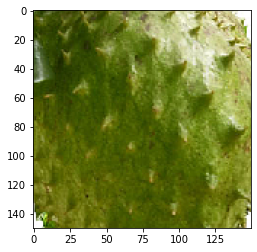

(32, 150, 150, 3)
[1. 0. 0.]


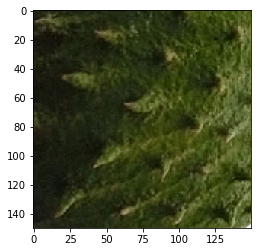

(32, 150, 150, 3)
[0. 1. 0.]


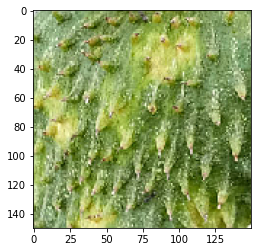

(23, 150, 150, 3)
[0. 0. 1.]


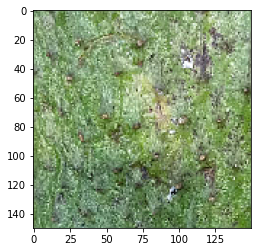

(32, 150, 150, 3)
[1. 0. 0.]


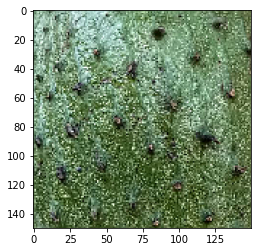

(32, 150, 150, 3)
[1. 0. 0.]


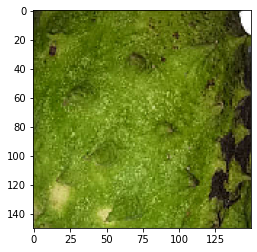

In [14]:
for i in range(6):
    img, label = test_generator.next()
    print(img.shape)
    print(label[i])
    plt.imshow(img[i])
    plt.show()

# C. Image Classification

### Model CNN

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2, seed=123),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2, seed=123),
    tf.keras.layers.Dense(3, activation='softmax')
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

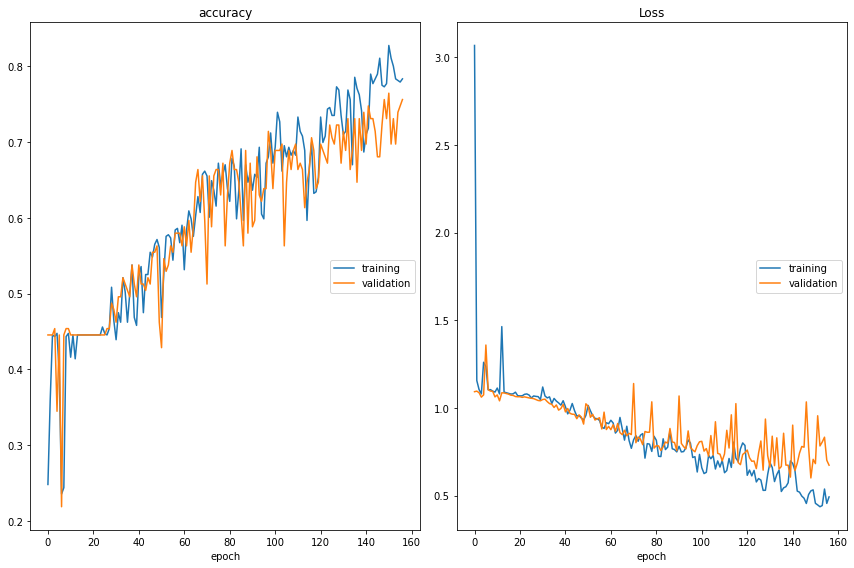

accuracy
	training         	 (min:    0.235, max:    0.828, cur:    0.784)
	validation       	 (min:    0.218, max:    0.765, cur:    0.756)
Loss
	training         	 (min:    0.436, max:    3.067, cur:    0.492)
	validation       	 (min:    0.600, max:    1.359, cur:    0.673)
15/15 [==============================] - 22s 1s/step - loss: 0.4921 - accuracy: 0.7836 - val_loss: 0.6731 - val_accuracy: 0.7563
Epoch 158/205


In [ ]:
history = model.fit(
    train_generator,
    epochs = 205,
    validation_data = test_generator,
    callbacks = [callbacks, PlotLossesKeras()])

### Penyimpanan Model

In [ ]:
model.save('./Model/CNN_kematangansirsak') #save model

# D. Perhitungan Akurasi Model

### Load Model

In [ ]:
from keras.models import load_model
model_new = load_model('./Model/CNN_kematangansirsak') #load model

### Perhitungan Akurasi Model Pada Data Training

In [ ]:
train_datagen1 = ImageDataGenerator(
    rescale = 1./255
    )

train_generator1 = train_datagen1.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical',
    classes=class_name,
    shuffle=False,
    seed=123,
    save_format='png')

In [ ]:
Ytrain=train_generator.classes
Ytrain

In [ ]:
predictionstrain = model_new.predict(train_generator1)
Ytrain_pred = np.argmax(predictionstrain, axis=1) #memprediksi
Ytrain_pred.flatten()

In [ ]:
confusion_matrix(Ytrain,Ytrain_pred)

In [ ]:
mab, masme, masse, mesma, meb, messe, sesma, sesme, seb = confusion_matrix(Ytrain,Ytrain_pred).flatten()
print('Prediksi Benar Matang: ',mab)
print('Prediksi Salah Matang malah Mentah: ',masme)
print('Prediksi Salah Matang malah Setengah Matang: ',masse)
print('Total Prediksi Salah: ',masme+masse)
print()
print('Prediksi Salah Mentah malah Matang: ',mesma)
print('Prediksi Benar Mentah: ',meb)
print('Prediksi Salah Mentah malah Setengah Matang: ',messe)
print('Total Prediksi salah: ',mesma+messe)
print()
print('Prediksi Salah Setengah Matang malah Matang: ',sesma)
print('Prediksi Salah Setengah Matang malah Mentah: ',sesme)
print('Prediksi Benar Setengah Matang: ',seb)
print('Total Prediksi Salah: ', sesma+sesme)

In [ ]:
accuracy_score(Ytrain,Ytrain_pred)

### Perhitungan Akurasi Model Pada Data Testing

In [ ]:
Ytest=test_generator.classes
Ytest

In [ ]:
predictionstest = model_new.predict(test_generator)
Ytest_pred = np.argmax(predictionstest, axis=1) #memprediksi
Ytest_pred.flatten()

In [ ]:
confusion_matrix(Ytest,Ytest_pred)

In [ ]:
mab, masme, masse, mesma, meb, messe, sesma, sesme, seb = confusion_matrix(Ytest,Ytest_pred).flatten()
print('Prediksi Benar Matang: ',mab)
print('Prediksi Salah Matang malah Mentah: ',masme)
print('Prediksi Salah Matang malah Setengah Matang: ',masse)
print('Total Prediksi Salah: ',masme+masse)
print()
print('Prediksi Salah Mentah malah Matang: ',mesma)
print('Prediksi Benar Mentah: ',meb)
print('Prediksi Salah Mentah malah Setengah Matang: ',messe)
print('Total Prediksi salah: ',mesma+messe)
print()
print('Prediksi Salah Setengah Matang malah Matang: ',sesma)
print('Prediksi Salah Setengah Matang malah Mentah: ',sesme)
print('Prediksi Benar Setengah Matang: ',seb)
print('Total Prediksi Salah: ', sesma+sesme)

In [ ]:
accuracy_score(Ytest,Ytest_pred)

# F. Pengujian Citra Data Baru

#### Menentukan Direktori Citra Data Baru

In [ ]:
uji_matang='D:\\MyPython\\Sirsak\\uji\\matang\\' 
uji_setmatang='D:\\MyPython\\Sirsak\\uji\\setengah matang\\'
uji_mentah='D:\\MyPython\\Sirsak\\uji\\mentah\\'

ujiedit_matang='D:\\MyPython\\Sirsak\\ujiedit\\matang\\' 
ujiedit_setmatang='D:\\MyPython\\Sirsak\\ujiedit\\setengah matang\\'
ujiedit_mentah='D:\\MyPython\\Sirsak\\ujiedit\\mentah\\'

#### ImageFilter Citra Data Baru

In [ ]:
# c=1
# for filename in os.listdir(uji_mentah):
#     if filename.endswith(".jpg"):
#         im0 = Image.open(os.path.join(uji_mentah,filename))
#         nama='imgmentah'+str(c)+'.png'
#         rgb_im0 = im0.filter(ImageFilter.SHARPEN)
#         rgb_im0.save(ujiedit_mentah + nama)
# #         os.remove(ujiedit_mentah + nama)
#         c+=1
#         continue
#     else:
#         continue


# c=1
# for filename in os.listdir(uji_setmatang):
#     if filename.endswith(".jpg"):
#         im2 = Image.open(os.path.join(uji_setmatang,filename))
#         nama='imgsetmatang'+str(c)+'.png'
#         rgb_im2 = im2.filter(ImageFilter.SHARPEN)
#         rgb_im2.save(ujiedit_setmatang + nama)
# #         os.remove(ujiedit_setmatang + nama)
#         c+=1
#         continue
#     else:
#         continue


# c=1
# for filename in os.listdir(uji_matang):
#     if filename.endswith(".jpg"):
#         im1 = Image.open(os.path.join(uji_matang,filename))
#         nama='imgmatang'+str(c)+'.png'
#         rgb_im1 = im1.filter(ImageFilter.SHARPEN)
#         rgb_im1.save(ujiedit_matang + nama)
# #         os.remove(ujiedit_matang + nama)
#         c+=1
#         continue
#     else:        continue

#### Image Preprocessing Data Baru

In [ ]:
uji_datagen = ImageDataGenerator(
    rescale = 1./255
    )
uji_generator = uji_datagen.flow_from_directory(
    uji_dir,
    target_size = (150,150),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle=False,
    seed=123,
    save_format='png')

In [ ]:
Yuji=uji_generator.classes
Yuji

#### Prediksi Citra Data Baru

In [ ]:
predictions_uji = model_new.predict(uji_generator)
Yuji_pred = np.argmax(predictions_uji, axis=1) #memprediksi
Yuji_pred.flatten()

In [ ]:
confusion_matrix(Yuji,Yuji_pred)

In [ ]:
mab, masme, masse, mesma, meb, messe, sesma, sesme, seb = confusion_matrix(Yuji,Yuji_pred).flatten()
print('Prediksi Benar Matang: ',mab)
print('Prediksi Salah Matang malah Mentah: ',masme)
print('Prediksi Salah Matang malah Setengah Matang: ',masse)
print('Total Prediksi Salah: ',masme+masse)
print()
print('Prediksi Salah Mentah malah Matang: ',mesma)
print('Prediksi Benar Mentah: ',meb)
print('Prediksi Salah Mentah malah Setengah Matang: ',messe)
print('Total Prediksi salah: ',mesma+messe)
print()
print('Prediksi Salah Setengah Matang malah Matang: ',sesma)
print('Prediksi Salah Setengah Matang malah Mentah: ',sesme)
print('Prediksi Benar Setengah Matang: ',seb)
print('Total Prediksi Salah: ', sesma+sesme)

In [ ]:
predictions_uji

#### Plot Prediksi Citra Data Baru

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i in range(15):
    img, label = uji_generator.next()
    ax = fig.add_subplot(3,5,i + 1, xticks=[], yticks=[])
    ax.imshow(img[i])
    plt.tight_layout()
    ax.set_title("{} \n ({})".format(class_name[Yuji[i]], class_name[Yuji_pred[i]]),
                                     color=("green" if Yuji[i] == Yuji_pred[i] else "red"))

#### Tabel Prediksi Citra Data Baru

In [ ]:
import pandas as pd
data = pd.DataFrame(Yuji, columns=['Label'])
data['Keterangan Label']=data['Label'].astype(str).map({'0':'matang','1':'mentah','2':'setengah matang'})
data['Prediksi']=Yuji_pred
data['Keterangan Prediksi']=data['Prediksi'].astype(str).map({'0':'matang','1':'mentah','2':'setengah matang'})
data['Keterangan']=(data['Label']==data['Prediksi'])
data

#### Akurasi Citra Data Baru

In [ ]:
accuracy_score(Yuji,Yuji_pred)